# Analysing a PPG signal

This notebook is aimed at those with no knowledge of HeartPy. It contains a few simple examples of the API available.

In this notebook we'll go over how to analyse a regular PPG signal with HeartPy.

For this we'll use the example datasets that are packaged with HeartPy.

In [84]:
#First let's import
import heartpy as hp
import matplotlib.pyplot as plt

HeartPy comes with a function ***load_exampledata()*** that can load the datasets provded. It will return a tuple (data, timer), where 'timer' is the timer column (ms or datetime). If no timer column is available a tuple is still returned, but with timer array being empty.

There's three datasets included with HeartPy:
- 0 : a short, very clean PPG signal, sampled at 100.0 Hz
- 1 : a slightly longer (~2 minute) PPG signal, with missing signal in first third, and random noise spikes in rest of signal
- 2 : a long (~11.5 minute) PPG signal recorded 'in the wild' while driving in a driving simulator using a Pulse Sensor on the index finger and an Arduino

---------

Let's go through all three examples and run an analysis for each.

In [71]:
# #first let's load the clean PPG signal
# data, timer = hp.load_exampledata(0)

# #and visualise
# plt.figure(figsize=(12,4))
# plt.plot(data)
# plt.show()

#### That is a beautiful signal. Analysis should pose no issue

when running ***hp.process()***, two dicts are returned: working_data (containing working data that you may want to access nonetheless, like peak positions and peak-peak intervals), and measures (containing the computed output measures).

In the docs we abbreviate these to **'wd'** and **'m'**

In [72]:
# #run the analysis
# wd, m = hp.process(data, sample_rate = 100.0)

#### Now you may want to visualize the results of the analysis.

Heartpy comes with a function ***hp.plotter(wd, m)*** that does just this. The function requires you to give it the working_data and measures dict.

If you specify parameters like a figure size to matplotlib before calling ***hp.plotter(wd, m)***, the specified figure size will be used.

In [73]:
# #set large figure
# plt.figure(figsize=(12,4))

# #call plotter
# hp.plotter(wd, m)

# #display measures computed
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

That looks nice, and we ran into no problems.

----------

Let's move on to the second included dataset and explore it first:

In [74]:
# data, timer = hp.load_exampledata(1)

# plt.figure(figsize=(12,4))
# plt.plot(data)
# plt.show()

This is a more tricky signal I made intentionally. There's no signal in the beginning as I started recording before and while putting on the sensor. After the signal commences there's a few noise spikes as I forcefully moved the sensor while recording. This imitates what may happen when recording 'in the wild' as well if the participant moves and accidentally tugs at a sensor cable.

HeartPy is designed to handle this sort of thing out of the box. Let's look at the example first:

In [75]:
# sample_rate = hp.get_samplerate_mstimer(timer)

# wd, m = hp.process(data, sample_rate)

# #plot
# plt.figure(figsize=(12,4))
# hp.plotter(wd, m)

# #display measures computed
# for measure in m.keys():
#     print('%s: %f' %(measure, m[measure]))

Note we computed the sample_rate from a timer column (that was in ms values). This is important beforehand since we didn't know with what sample_rate the signal was sampled. All measures depend on knowing the sample rate.

HeartPy comes with two functions: ***hp.get_samplerate_mstimer()*** that computes sample rate based on a ms-timer, and ***hp.get_samplerate_datetime()***, that computes sample_rate based on a column in datetime values.

You saw how we used the mstimer earlier, now let's look at a 'in the wild' recording that uses datetime strings to encode time:

In [76]:
# data, timer = hp.load_exampledata(2)
# import csv
# # export data and timer to csv
# csvfile = open('presetheartdata.csv', 'w')
# with open('presetheartdata.csv', 'w') as csvfile:
# 	writer = csv.writer(csvfile)
# 	writer.writerow(['data', 'timer'])
# #  add data to csv
# 	for i in range(len(data)):
# 		writer.writerow([timer[i], data[i]])

In [77]:
# # replace . with : in timer
# for i in range(len(timer)):
# 	timer[i] = timer[i].replace('.', ':')

In [78]:
# mydict = {}
# for i in range(len(data)):
# 	mydict[timer[i]] = data[i]

# import json

# mydict
# myjsondict = {}
# myjsondict["gsr"] = 0
# myjsondict["pulse"] = mydict
# myjsondict

# with open('presetheartdata.json', 'w') as outfile:
# 	json.dump(myjsondict, outfile)

In [79]:
import firebase_admin
import google.cloud
from firebase_admin import credentials

cred_obj = firebase_admin.credentials.Certificate('ServiceAccountKey.json')
default_app = firebase_admin.initialize_app(cred_obj, {
	'databaseURL':'https://nodemcutest-e668d-default-rtdb.firebaseio.com/'
	})



ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [85]:
from firebase_admin import db
ref = db.reference('/pulse')
data = ref.get()
data

{'2016-11-24 13:58:58:081000': 326,
 '2016-11-24 13:58:58:097000': 352,
 '2016-11-24 13:58:58:112000': 389,
 '2016-11-24 13:58:58:128000': 526,
 '2016-11-24 13:58:58:144000': 728,
 '2016-11-24 13:58:58:159000': 847,
 '2016-11-24 13:58:58:175000': 978,
 '2016-11-24 13:58:58:190000': 978,
 '2016-11-24 13:58:58:206000': 978,
 '2016-11-24 13:58:58:222000': 978,
 '2016-11-24 13:58:58:237000': 977,
 '2016-11-24 13:58:58:253000': 977,
 '2016-11-24 13:58:58:268000': 947,
 '2016-11-24 13:58:58:284000': 729,
 '2016-11-24 13:58:58:300000': 509,
 '2016-11-24 13:58:58:315000': 412,
 '2016-11-24 13:58:58:331000': 257,
 '2016-11-24 13:58:58:346000': 208,
 '2016-11-24 13:58:58:362000': 150,
 '2016-11-24 13:58:58:378000': 158,
 '2016-11-24 13:58:58:393000': 180,
 '2016-11-24 13:58:58:409000': 262,
 '2016-11-24 13:58:58:424000': 309,
 '2016-11-24 13:58:58:440000': 411,
 '2016-11-24 13:58:58:456000': 503,
 '2016-11-24 13:58:58:471000': 530,
 '2016-11-24 13:58:58:487000': 574,
 '2016-11-24 13:58:58:502000

In [86]:
import numpy as np
timer = data.keys()
datah = data.values()

timer = list(timer)
timer= np.array(timer)

datah = list(datah)
datah = np.array(datah)

When computing the sample rate we need to give ***get_samplerate_datetime()*** the format of the string (by default it expects HH:MM:SS.ms):

In [87]:
sample_rate = hp.get_samplerate_datetime(timer, timeformat='%Y-%m-%d %H:%M:%S:%f')

print('sample rate is: %f Hz' %sample_rate)
datah.shape

sample rate is: 64.087298 Hz


(43701,)

Now that we know all that, running the analysis is the same as before:


Finished in 0.286018 sec


<Figure size 864x288 with 0 Axes>

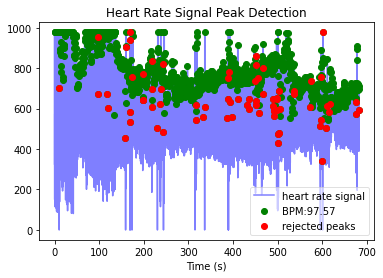

In [98]:
wd, m = hp.process(datah, sample_rate, report_time = True)

import csv
openfile = open('presetheartdata.csv', 'w')
with open('presetheartdata.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['data', 'timer'])
    writer.writerow([wd, m])

#plot
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

bpm: 97.567863
ibi: 614.956584
sdnn: 66.641049
sdsd: 34.811778
rmssd: 44.705519
pnn20: 0.444557
pnn50: 0.122075
hr_mad: 31.207432
sd1: 31.611000
sd2: 85.515631
s: 8492.461880
sd1/sd2: 0.369652
breathingrate: 0.110937


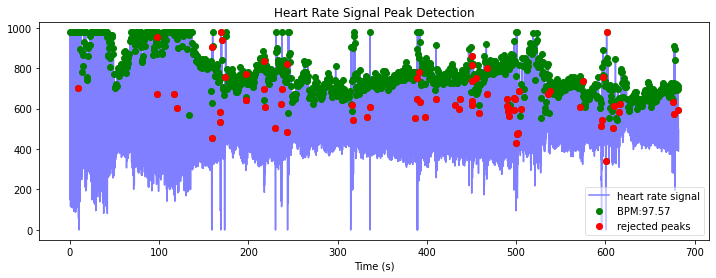

In [110]:
# let's zoom in on a bit
# fig, ax = plt.subplots(figsize=(12,4))
hp.plotter(wd, m, figsize=(12,4))

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))